In [ ]:
import pandas as pd

file_path = "data.txt"

beer = pd.read_csv(file_path,sep=" ")

print(beer)

#從DataFrame容器選擇欄位
X = beer[["calories","sodium","alcohol","cost"]]

print(X)

In [ ]:
from sklearn.cluster import KMeans

km1 = KMeans(n_clusters=3).fit(X)

km2 = KMeans(n_clusters=2).fit(X)

print(type(km1.labels_))
print(km1.labels_)

print(type(km2.labels_))
print(km2.labels_)

beer["cluster_1"] = km1.labels_

beer["cluster_2"] = km2.labels_

print(beer)


In [ ]:
#依cluster_1欄位由小到大排序
beer.sort_values("cluster_1")

In [14]:
#取出群中心
cluster_centers_1 = km1.cluster_centers_
print(type(cluster_centers_1))
print(cluster_centers_1)

cluster_centers_2 = km2.cluster_centers_
print(type(cluster_centers_2))
print(cluster_centers_2)

<class 'numpy.ndarray'>
[[ 70.          10.5          2.6          0.42      ]
 [150.          17.           4.52142857   0.52071429]
 [102.75        10.           4.075        0.44      ]]
<class 'numpy.ndarray'>
[[150.          17.           4.52142857   0.52071429]
 [ 91.83333333  10.16666667   3.58333333   0.43333333]]


In [16]:
g = beer.groupby("cluster_1").mean()

print(g)

           calories  sodium   alcohol      cost  cluster_2
cluster_1                                                 
0             70.00    10.5  2.600000  0.420000          1
1            150.00    17.0  4.521429  0.520714          0
2            102.75    10.0  4.075000  0.440000          1


In [38]:
#計算所有樣本的平均側影係數(Aaverage Silhouette Score)

from sklearn import metrics

#silhouette_score()輸入的第一個參數為資料集
#silhouette_score()輸入的第二個參數為群組標籤(cluster labels)
#silhouette_score()回傳所有樣本的平均側影係數值

avg_score = metrics.silhouette_score(X,beer.cluster_1)
print(avg_score)


0.6731775046455796


In [39]:
#計算每個樣本的側影係數(Silhouette Score for Each Sample)

from sklearn import metrics

#silhouette_samples()輸入的第一個參數為資料集
#silhouette_samples()輸入的第二個參數為群組標籤(cluster labels)
#silhouette_samples()回傳所有樣本的平均側影係數值

each_score = metrics.silhouette_samples(X,beer.cluster_1)
print(each_score)

[0.70675469 0.76452939 0.72886968 0.61617846 0.72693924 0.71443876
 0.60338722 0.69658018 0.73244266 0.62713976 0.64382053 0.71134265
 0.41418302 0.76439083 0.65086168 0.72050474 0.61676721 0.69195879
 0.68369738 0.64876323]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0f308b1208>,
      dtype=object)

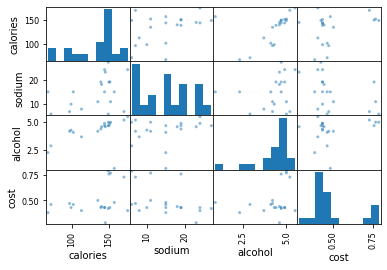

In [40]:
#繪製散佈圖矩陣
pd.plotting.scatter_matrix(X)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0f305b19e8>,
      dtype=object)

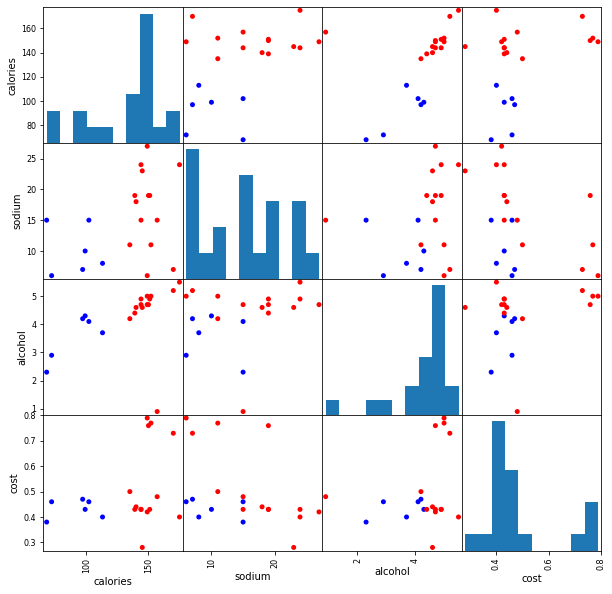

In [32]:
#結合參數繪製散佈圖矩陣
import numpy as np
colors = np.array(["red","blue","green"])
pd.plotting.scatter_matrix(X,s=100,alpha=1,
              c=colors[beer["cluster_2"]],
              figsize=(10,10))

In [45]:

avg_score_seq = []

for k in range(2,20):
  labels = KMeans(n_clusters=k).fit(X).labels_
  avg_score = metrics.silhouette_score(X,labels)
  avg_score_seq.append(avg_score)



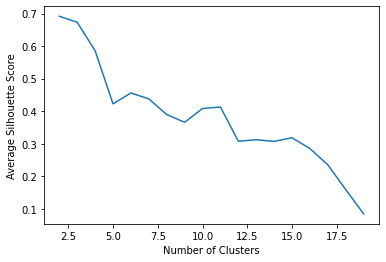

In [53]:
import matplotlib.pyplot as plt

plt.plot(list(range(2,20)),avg_score_seq)
plt.xlabel("Number of Clusters")
plt.ylabel("Average Silhouette Score")
plt.show()

#當n_clusters=2時，有最高的側影係數分數